# **Import The Data from Drive**

**Data Dictionary:**

0. Comments: Comments from viewers
1.   Comment_ID: ID of the comment
2.   Reply_Count: Number of reply in a comment
3. Like_Count: Number of like in a comment
4. Date: Date of comments
5. VidId:	ID of the video
6. user_ID: ID of the commentator

In [1]:
# load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

from google.colab import files

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1rbQBNoYQReLd0OqkOdLKK_WbAwNhTWYHcc8bRUMrfMg/edit#gid=445691279'
sheet_url_trf = sheet_url.replace('/edit#gid=445691279', '/export?format=csv&gid=445691279')
print(sheet_url_trf)
comments_df = pd.read_csv(sheet_url_trf)
comments_df.head()

https://docs.google.com/spreadsheets/d/1rbQBNoYQReLd0OqkOdLKK_WbAwNhTWYHcc8bRUMrfMg/export?format=csv&gid=445691279


,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816


In [3]:
type(comments_df)

pandas.core.frame.DataFrame

In [4]:
# check the data type
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Comments     10239 non-null  object
 1   Comment_ID   10240 non-null  object
 2   Reply_Count  10240 non-null  int64 
 3   Like_Count   10240 non-null  int64 
 4   Date         10240 non-null  object
 5   VidId        10240 non-null  object
 6   user_ID      10240 non-null  object
dtypes: int64(2), object(5)
memory usage: 560.1+ KB


In [5]:
comments_df['Date']

0        2022-01-22T08:13:29Z
1        2022-01-22T01:09:46Z
2        2022-01-21T23:59:05Z
3        2022-01-21T23:00:37Z
4        2022-01-21T20:24:20Z
                 ...         
10235    2018-07-06T07:08:39Z
10236    2018-05-15T00:01:12Z
10237    2018-05-04T20:58:54Z
10238    2018-02-20T16:46:19Z
10239    2017-12-03T18:52:35Z
Name: Date, Length: 10240, dtype: object

In [6]:
# change the data type of Date, from object to datetime
comments_df['Date'] = pd.to_datetime(comments_df['Date'])
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Comments     10239 non-null  object             
 1   Comment_ID   10240 non-null  object             
 2   Reply_Count  10240 non-null  int64              
 3   Like_Count   10240 non-null  int64              
 4   Date         10240 non-null  datetime64[ns, UTC]
 5   VidId        10240 non-null  object             
 6   user_ID      10240 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 560.1+ KB


In [7]:
# set the date format to day-month-year hour:minute
s_string = comments_df['Date'].dt.strftime('%d-%m-%Y %H:%M')
s_string

0        22-01-2022 08:13
1        22-01-2022 01:09
2        21-01-2022 23:59
3        21-01-2022 23:00
4        21-01-2022 20:24
               ...       
10235    06-07-2018 07:08
10236    15-05-2018 00:01
10237    04-05-2018 20:58
10238    20-02-2018 16:46
10239    03-12-2017 18:52
Name: Date, Length: 10240, dtype: object

In [8]:
comments_df.describe()

,Reply_Count,Like_Count
count,10240.000000,10240.000000
mean,1.337695,2.767578
std,1.096668,10.803318
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,21.000000,501.000000


# **Data Cleaning**

## Check Duplicate

In [9]:
# check duplicate --> result: no duplicate
df_dup = comments_df.copy()
df_dup = df_dup.drop_duplicates
df_dup

<bound method DataFrame.drop_duplicates of                                                 Comments  \
0      Thanks for this video Ken.\n\nI decided to go ...   
1      Hello ken jee!!! I'm doing a graduation on Com...   
2      Thanks for this video, man. So useful. I'll me...   
3      Great video!!! I started learning Python 8 mon...   
4      Been watching hours of your material (and Tina...   
...                                                  ...   
10235  Dear Ken,\nMay I know how the input data with ...   
10236  What's your prediction Ken for 2018 or at leas...   
10237  Nice. I have some nice models for this doing v...   
10238  Great video! Can you please post the github li...   
10239  Hi Ken\n\nI've been researching about this. Wo...   

                       Comment_ID  Reply_Count  Like_Count  \
0      UgxFZTIzC4UPyhhX_PZ4AaABAg            0           0   
1      Ugx3IYuAufhb932GYQx4AaABAg            0           0   
2      UgyhwwoK24arzRt1mud4AaABAg            0    

## Check Missing Data

In [10]:
# find missing data 
comments_df.isna().sum()

Comments       1
Comment_ID     0
Reply_Count    0
Like_Count     0
Date           0
VidId          0
user_ID        0
dtype: int64

In [11]:
# check the data with null value in comments
# comments_df['Comments'].isnull()
comments_df[comments_df['Comments'].isnull()]

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
866,NaN,UgxOlwaJtK0J35twq9Z4AaABAg,1,2,2021-10-29 12:02:40+00:00,ammCGdzSoag,user_5208


In [12]:
# we will remove one missing data from comments
# remove row with null value because the data is not replaceable
# copy comments data to create the new variable so that it wont change the original data
dropped_comments_df = comments_df.copy()
dropped_comments_df.dropna(axis=0,inplace=True)
dropped_comments_df


,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22 08:13:29+00:00,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22 01:09:46+00:00,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21 23:59:05+00:00,rEWPqw6rMGI,user_1065
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21 23:00:37+00:00,xpIFS6jZbe8,user_3391
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21 20:24:20+00:00,sHRq-LshG3U,user_2816
...,...,...,...,...,...,...,...
10235,"Dear Ken,\nMay I know how the input data with ...",UgzX5v48CJAPbvynwTR4AaABAg,1,0,2018-07-06 07:08:39+00:00,qfRhKHV8-t4,user_5850
10236,What's your prediction Ken for 2018 or at leas...,UgwdI9ydb2nk-FIJ1sN4AaABAg,0,0,2018-05-15 00:01:12+00:00,qfRhKHV8-t4,user_2676
10237,Nice. I have some nice models for this doing v...,UgyTi5fEIpZBoED9Fc94AaABAg,0,0,2018-05-04 20:58:54+00:00,qfRhKHV8-t4,user_4533
10238,Great video! Can you please post the github li...,UgyhJTCKn88b0lggR794AaABAg,0,0,2018-02-20 16:46:19+00:00,qfRhKHV8-t4,user_3368


In [13]:
# i want to look at how many unique user ID that comments to Ken Jee's video 

comments_df[comments_df['user_ID'].duplicated()]

# there are 4365 users ID from 10239 comments: average of comments/userID = 10239/4365 = 2.35 --> 1 user comments 2-3 times in Ken Jee's videos
# It could suggest that they are highly engaged with the content and may be more likely to interact with Ken Jee's channel in the future. 

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
6,So basically is it modest to say that the silv...,UgxdvNxfl4oh9zqJPFh4AaABAg,0,0,2022-01-21 13:40:39+00:00,Q9FjwzKFPuM,user_2816
28,really catch the trend,UgxvQ2aTyyk6oLz0DKR4AaABAg,0,0,2022-01-18 09:22:08+00:00,0jTtHYie3CU,user_4146
30,"I'm 40, want to live in Asia and work remotely...",Ugx9V-Qz4ba3gzBApqB4AaABAg,0,0,2022-01-18 08:56:50+00:00,Q9FjwzKFPuM,user_3706
31,So how can you get a job this way?,Ugw7V6S6nABu8lRq6nJ4AaABAg,0,0,2022-01-18 08:53:34+00:00,4OZip0cgOho,user_3706
37,Who owns kaggle,Ugxo3gO0vl-2J3Tw3bp4AaABAg,0,0,2022-01-17 20:28:09+00:00,n7kjelw9s2w,user_1655
...,...,...,...,...,...,...,...
10219,Awesome content! I play Daily Fantasy sports e...,UgxKLsYK_K7cVRgtD6l4AaABAg,3,0,2019-04-18 03:02:14+00:00,smeFkHwnM_k,user_43
10221,"If you aren't interested in the code, feel fre...",Ugzdg8EZebi_VmC9FKZ4AaABAg,0,2,2019-03-09 21:58:44+00:00,_CS4u9cORwA,user_2385
10228,Link to Medium Article: https://towardsdatasci...,UgxKaNA9YywaWaCLKOJ4AaABAg,0,0,2019-02-04 23:43:28+00:00,XoUyK3XHZHs,user_2385
10230,Hello everyone - Thank you for your comments! ...,UgxXgz2giFufu-S1rBB4AaABAg,2,2,2018-11-06 03:32:47+00:00,qfRhKHV8-t4,user_2385


## Filtering Data

We will drop comments from videos that uploaded in 2017, 2018, and 2022, so we only keep comments of 2019 - 2021 videos.

Then we filter the comments that created in 2019 - 2021.

In [14]:
# create a copy of dropped null comment before drop comments based on video ID, we only take the comments of video that made in 2018 - 2021
drop_year = dropped_comments_df.copy()

In [15]:
# list of video ID that will be take out because the period is not in 2019 - 2021
drop_code = ['qfRhKHV8-t4', 
           '5p73cIRYCZg', 
          'RRSRKf9eQxc', 
            'irjTWNV0eAY', 
            'IFceyuL6GZY', 
            'Y_SMU701qlA',
            'sCOX5yShmFA',
            'FBgs-BSTIJE',
            'j-Z-je6K4Yg',
            'o-wsyxWbPOw',
            'rEWPqw6rMGI',
            '0jTtHYie3CU',
            '2RWwN5ZT4tA'
            ]

In [16]:
# drop comments in a video id above
df_drop_year_vid_id = drop_year[~drop_year.isin(drop_code).any(axis=1)]

In [17]:
# comments from video 2019 - 2021
df_drop_year_vid_id

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22 08:13:29+00:00,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22 01:09:46+00:00,xpIFS6jZbe8,user_213
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21 23:00:37+00:00,xpIFS6jZbe8,user_3391
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21 20:24:20+00:00,sHRq-LshG3U,user_2816
5,Hey Ken! I am almost finishing my university d...,UgwimG8chbbq3OQuR1Z4AaABAg,0,0,2022-01-21 14:32:13+00:00,YR9Faf1uZDg,user_2217
...,...,...,...,...,...,...,...
10223,Wow your channel is just what I needed!! Thank...,UgwgT8nZJEZ-UA34uUl4AaABAg,1,1,2019-03-07 06:12:20+00:00,tv1e22u2COk,user_325
10224,Dang you deserve way more subscribers and views..,Ugw0qE9cDErtq8jRPl14AaABAg,1,3,2019-03-07 05:04:25+00:00,XTrlMQXYqts,user_3890
10225,Really awesome mate! I am a BIG...no HUGE beli...,UgyVNnmuuSJnpli1m1F4AaABAg,1,2,2019-03-06 23:18:04+00:00,smeFkHwnM_k,user_658
10226,Great video bro!!,UgxEENbVC1tETzLqGT94AaABAg,4,0,2019-03-06 05:39:36+00:00,tv1e22u2COk,user_757


In [18]:
df_drop_year_vid_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9952 entries, 0 to 10228
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Comments     9952 non-null   object             
 1   Comment_ID   9952 non-null   object             
 2   Reply_Count  9952 non-null   int64              
 3   Like_Count   9952 non-null   int64              
 4   Date         9952 non-null   datetime64[ns, UTC]
 5   VidId        9952 non-null   object             
 6   user_ID      9952 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 622.0+ KB


In [19]:
# filter data from 2019 - 2021 

# # convert date column to datetime format
# comments_df['Date'] = pd.to_datetime(comments_df['Date'])

# filter data for 2019-2021
cond = (df_drop_year_vid_id['Date'].dt.year >= 2019) & (df_drop_year_vid_id['Date'].dt.year <= 2021)
filtered_comments = df_drop_year_vid_id[cond]
filtered_comments

# result 9846 rows x 7 columns

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
266,Helping the algo.,UgxA73KDZOrQx-djSeR4AaABAg,1,1,2021-12-31 19:22:09+00:00,8igH8qZafpo,user_5175
267,Boss Ken..\n6months on the go...\nI consider I...,UgxbJQyfIVHA8CgaaTl4AaABAg,1,2,2021-12-31 17:30:32+00:00,xpIFS6jZbe8,user_1948
268,I'm a Business Intelligence analyst working on...,Ugx_Y0DVMRBgX5r_szR4AaABAg,2,1,2021-12-31 16:29:11+00:00,sICJ6a2wX5g,user_950
269,Hello Ken Jee.\nThank you for all the amazing ...,Ugx94o0d-frS2eWmyIJ4AaABAg,0,0,2021-12-31 11:40:25+00:00,Fs_LG5Y8GIU,user_1762
270,This is much needed video. As in most of the c...,UgzUw-eQJ8zhgZ2iBt14AaABAg,0,2,2021-12-31 11:01:57+00:00,zSwM5uVeylU,user_659
...,...,...,...,...,...,...,...
10223,Wow your channel is just what I needed!! Thank...,UgwgT8nZJEZ-UA34uUl4AaABAg,1,1,2019-03-07 06:12:20+00:00,tv1e22u2COk,user_325
10224,Dang you deserve way more subscribers and views..,Ugw0qE9cDErtq8jRPl14AaABAg,1,3,2019-03-07 05:04:25+00:00,XTrlMQXYqts,user_3890
10225,Really awesome mate! I am a BIG...no HUGE beli...,UgyVNnmuuSJnpli1m1F4AaABAg,1,2,2019-03-06 23:18:04+00:00,smeFkHwnM_k,user_658
10226,Great video bro!!,UgxEENbVC1tETzLqGT94AaABAg,4,0,2019-03-06 05:39:36+00:00,tv1e22u2COk,user_757


## Cleaned Data

In [20]:
# create a copy of cleaned data 
comments_clean = filtered_comments.copy()
comments_clean.head()

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
266,Helping the algo.,UgxA73KDZOrQx-djSeR4AaABAg,1,1,2021-12-31 19:22:09+00:00,8igH8qZafpo,user_5175
267,Boss Ken..\n6months on the go...\nI consider I...,UgxbJQyfIVHA8CgaaTl4AaABAg,1,2,2021-12-31 17:30:32+00:00,xpIFS6jZbe8,user_1948
268,I'm a Business Intelligence analyst working on...,Ugx_Y0DVMRBgX5r_szR4AaABAg,2,1,2021-12-31 16:29:11+00:00,sICJ6a2wX5g,user_950
269,Hello Ken Jee.\nThank you for all the amazing ...,Ugx94o0d-frS2eWmyIJ4AaABAg,0,0,2021-12-31 11:40:25+00:00,Fs_LG5Y8GIU,user_1762
270,This is much needed video. As in most of the c...,UgzUw-eQJ8zhgZ2iBt14AaABAg,0,2,2021-12-31 11:01:57+00:00,zSwM5uVeylU,user_659


# **Sentiment Analysis**

In [21]:
print('Comments on videos - ', format(len(comments_clean['Comments'])))
print('Unique Videos - ', format(comments_clean['VidId'].nunique()))
print('Comments per Video -', format(int(len(comments_clean['Comments'])/comments_clean['VidId'].nunique())))

Comments on videos -  9846
Unique Videos -  210
Comments per Video - 46


**Insights:**

There are 9846 comments from 210 videos in 2019 - 2021

Comments per video are 46

In [22]:
# removes puntuation characters and whitespace in comments
def clean_text(text):
    text = text.lower().strip()
    text = re.sub(r"([-?.!,/\"])", '', text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    text = re.sub(r"[ ]+", " ", text)
    text = re.sub('\n\n','', text)
    text = text.rstrip().strip()
    return text


In [23]:
comments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9846 entries, 266 to 10228
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Comments     9846 non-null   object             
 1   Comment_ID   9846 non-null   object             
 2   Reply_Count  9846 non-null   int64              
 3   Like_Count   9846 non-null   int64              
 4   Date         9846 non-null   datetime64[ns, UTC]
 5   VidId        9846 non-null   object             
 6   user_ID      9846 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 615.4+ KB


In [24]:
# This will convert the Comments column to a string, ignoring the index, and then apply the clean_text function to the resulting string.

clean_text(comments_clean['Comments'].to_string(index=False))

'helping the algo\nboss ken\\n6months on the go\\ni consider i\nim a business intelligence analyst working on \nhello ken jee\\nthank you for all the amazing c\nthis is much needed video as in most of the ca\nhi im a uni student majoring in business anal\n this is a great video thank you i needed it\n this is awesome excited to start\n the secret is already no more a secret 😁\nalready got my first book recommendation for 2022\nrecently bought a machine with 6gb rtx 2060 gpu\nthe most confusing topic for most of the beginn\nthe tip is to just dive into this journey witho\nmy cooking and data science analogy is \\nthe m\nthe best thing i learn from personal experience\ni believe data science is for a person who has \nwatching two years old video of yours got me no\n a job simp eh\nhow long will the 365 discount last is it only\n r for production \ni think everyone should talk about how they lea\nbeen waiting for this video\\n\\nto anyone re\nthe only question i got is do we need a tradit

In [25]:
clean_char_comments = []
for i in range(len(comments_clean['Comments'])):
    try:
        clean_char_comments.append(clean_text(comments_clean['Comments'][i]))
    except:
        clean_char_comments.append('None')
    if i % 1000==0:
        print(f'{i} iteration(s) completed')
comments_clean['Clean Comments'] = clean_char_comments

0 iteration(s) completed
1000 iteration(s) completed
2000 iteration(s) completed
3000 iteration(s) completed
4000 iteration(s) completed
5000 iteration(s) completed
6000 iteration(s) completed
7000 iteration(s) completed
8000 iteration(s) completed
9000 iteration(s) completed


In [26]:
polarity = []                                           # add polarity to determine positive, negative and neutral sentiment
for i in comments_clean['Clean Comments']:
    blob = TextBlob(i)
    polarity.append(round(blob.sentiment.polarity,3))
comments_clean['polarity'] = polarity
print('Polarity Column added to the dataframe')

Polarity Column added to the dataframe


In [27]:
comments_clean

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID,Clean Comments,polarity
266,Helping the algo.,UgxA73KDZOrQx-djSeR4AaABAg,1,1,2021-12-31 19:22:09+00:00,8igH8qZafpo,user_5175,None,0.000
267,Boss Ken..\n6months on the go...\nI consider I...,UgxbJQyfIVHA8CgaaTl4AaABAg,1,2,2021-12-31 17:30:32+00:00,xpIFS6jZbe8,user_1948,None,0.000
268,I'm a Business Intelligence analyst working on...,Ugx_Y0DVMRBgX5r_szR4AaABAg,2,1,2021-12-31 16:29:11+00:00,sICJ6a2wX5g,user_950,None,0.000
269,Hello Ken Jee.\nThank you for all the amazing ...,Ugx94o0d-frS2eWmyIJ4AaABAg,0,0,2021-12-31 11:40:25+00:00,Fs_LG5Y8GIU,user_1762,None,0.000
270,This is much needed video. As in most of the c...,UgzUw-eQJ8zhgZ2iBt14AaABAg,0,2,2021-12-31 11:01:57+00:00,zSwM5uVeylU,user_659,None,0.000
...,...,...,...,...,...,...,...,...,...
10223,Wow your channel is just what I needed!! Thank...,UgwgT8nZJEZ-UA34uUl4AaABAg,1,1,2019-03-07 06:12:20+00:00,tv1e22u2COk,user_325,i want to ask unrelated question do you still ...,0.500
10224,Dang you deserve way more subscribers and views..,Ugw0qE9cDErtq8jRPl14AaABAg,1,3,2019-03-07 05:04:25+00:00,XTrlMQXYqts,user_3890,great video i love your consistency in produci...,0.567
10225,Really awesome mate! I am a BIG...no HUGE beli...,UgyVNnmuuSJnpli1m1F4AaABAg,1,2,2019-03-06 23:18:04+00:00,smeFkHwnM_k,user_658,i like your content a lot my comment is can yo...,0.267
10226,Great video bro!!,UgxEENbVC1tETzLqGT94AaABAg,4,0,2019-03-06 05:39:36+00:00,tv1e22u2COk,user_757,just got my masters degree in business analyti...,0.433


In [28]:
comments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9846 entries, 266 to 10228
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Comments        9846 non-null   object             
 1   Comment_ID      9846 non-null   object             
 2   Reply_Count     9846 non-null   int64              
 3   Like_Count      9846 non-null   int64              
 4   Date            9846 non-null   datetime64[ns, UTC]
 5   VidId           9846 non-null   object             
 6   user_ID         9846 non-null   object             
 7   Clean Comments  9846 non-null   object             
 8   polarity        9846 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 1.0+ MB


In [29]:
print('Reviews with Positive Sentiment based on Polarity :', len(comments_clean[comments_clean['polarity'] > 0]))   # counting the number of reviews with a positive polarity score, meaning that the review has a generally positive sentiment
print('Reviews with Negative Sentiment based on Polarity :', len(comments_clean[comments_clean['polarity'] < 0]))   # counting the number of reviews with a negative polarity score, meaning that the review has a generally negative sentiment
print('Reviews with Neutral Sentiment based on Polarity :', len(comments_clean[comments_clean['polarity'] == 0]))   # counting the number of reviews with a neutral polarity score, meaning that the review has a generally neutral sentiment

Reviews with Positive Sentiment based on Polarity : 6587
Reviews with Negative Sentiment based on Polarity : 741
Reviews with Neutral Sentiment based on Polarity : 2518


**Insight:**

Most comments are positive

Positive sentiment > Neutral Sentiment > Negative Sentiment

In [30]:
sentiment = []                                   # create a new column of sentiments
for v in comments_clean['polarity']:
    if v > 0:
        sentiment.append('Positive')             # checks if the polarity value for the current row is greater than 0. If it is, it appends the string 'Positive' to the 'sentiment' list.
    elif v < 0:
        sentiment.append('Negative')             # checks if the polarity value for the current row is less than 0. If it is, it appends the string 'Negative' to the 'sentiment' list.
    else:
        sentiment.append('Neutral')              # executed if the polarity value for the current row is exactly 0. In this case, it appends the string 'Neutral' to the 'sentiment' list.
comments_clean['sentiment'] = sentiment
print('Sentiment column has been added to the dataframe.')

Sentiment column has been added to the dataframe.


In [31]:
comments_clean

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID,Clean Comments,polarity,sentiment
266,Helping the algo.,UgxA73KDZOrQx-djSeR4AaABAg,1,1,2021-12-31 19:22:09+00:00,8igH8qZafpo,user_5175,None,0.000,Neutral
267,Boss Ken..\n6months on the go...\nI consider I...,UgxbJQyfIVHA8CgaaTl4AaABAg,1,2,2021-12-31 17:30:32+00:00,xpIFS6jZbe8,user_1948,None,0.000,Neutral
268,I'm a Business Intelligence analyst working on...,Ugx_Y0DVMRBgX5r_szR4AaABAg,2,1,2021-12-31 16:29:11+00:00,sICJ6a2wX5g,user_950,None,0.000,Neutral
269,Hello Ken Jee.\nThank you for all the amazing ...,Ugx94o0d-frS2eWmyIJ4AaABAg,0,0,2021-12-31 11:40:25+00:00,Fs_LG5Y8GIU,user_1762,None,0.000,Neutral
270,This is much needed video. As in most of the c...,UgzUw-eQJ8zhgZ2iBt14AaABAg,0,2,2021-12-31 11:01:57+00:00,zSwM5uVeylU,user_659,None,0.000,Neutral
...,...,...,...,...,...,...,...,...,...,...
10223,Wow your channel is just what I needed!! Thank...,UgwgT8nZJEZ-UA34uUl4AaABAg,1,1,2019-03-07 06:12:20+00:00,tv1e22u2COk,user_325,i want to ask unrelated question do you still ...,0.500,Positive
10224,Dang you deserve way more subscribers and views..,Ugw0qE9cDErtq8jRPl14AaABAg,1,3,2019-03-07 05:04:25+00:00,XTrlMQXYqts,user_3890,great video i love your consistency in produci...,0.567,Positive
10225,Really awesome mate! I am a BIG...no HUGE beli...,UgyVNnmuuSJnpli1m1F4AaABAg,1,2,2019-03-06 23:18:04+00:00,smeFkHwnM_k,user_658,i like your content a lot my comment is can yo...,0.267,Positive
10226,Great video bro!!,UgxEENbVC1tETzLqGT94AaABAg,4,0,2019-03-06 05:39:36+00:00,tv1e22u2COk,user_757,just got my masters degree in business analyti...,0.433,Positive


Column sentiment was added and can read the polarity score as:
* Polarity > 0 --> Positive sentiment

* Polarity < 0 --> Negative sentiment

* Polarity = 0 --> Neutral sentiment

In [32]:
print(comments_clean['polarity'][10228])

0.136


In [33]:
comments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9846 entries, 266 to 10228
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Comments        9846 non-null   object             
 1   Comment_ID      9846 non-null   object             
 2   Reply_Count     9846 non-null   int64              
 3   Like_Count      9846 non-null   int64              
 4   Date            9846 non-null   datetime64[ns, UTC]
 5   VidId           9846 non-null   object             
 6   user_ID         9846 non-null   object             
 7   Clean Comments  9846 non-null   object             
 8   polarity        9846 non-null   float64            
 9   sentiment       9846 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 1.1+ MB


In [34]:
sentiment_dict = {'Positive': 0, 'Neutral': 0, 'Negative': -1}

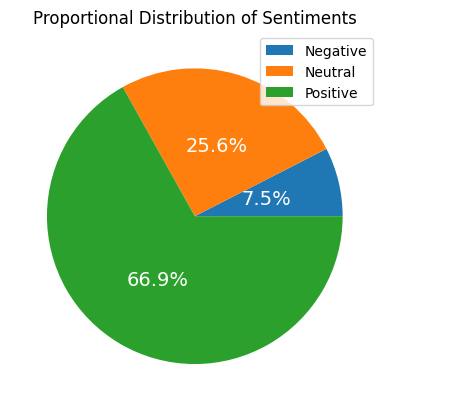

In [35]:
# Filter out rows with missing or non-numeric values in polarity column
polarity_clean = comments_clean.loc[comments_clean['polarity'].apply(lambda x: isinstance(x, (int, float))), 'polarity']

# Plotting the proportional distribution of sentiments
plt.pie(x=[
          len(polarity_clean[polarity_clean < 0]), 
          len(polarity_clean[polarity_clean == 0]), 
          len(polarity_clean[polarity_clean > 0])
          ], 
        labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%', pctdistance=0.5,
        textprops={'fontsize':14, 'color':'white'})
plt.title('Proportional Distribution of Sentiments')
plt.legend()
plt.show()

**Insights:**

Most comments are positive

In [36]:
df_a = comments_clean[['VidId','polarity','sentiment']].copy() # create a copy of comments_clean that consist of that list

In [37]:
df_a.sort_values(by='polarity',ascending= False).head(5) # sort top 5 of videos with highest positive polarity

,VidId,polarity,sentiment
3750,r-DR9HBaipU,1.0,Positive
1229,4OZip0cgOho,1.0,Positive
2390,DM1eE_Coh6g,1.0,Positive
8053,hpMc6TgT34I,1.0,Positive
4447,myhoWUrSP7o,1.0,Positive


Videos with highest positive polarity:

1. Kaggle Project From Scratch - Part 1 (Data Science Profession Survey)
2. How I Would Learn Data Science (If I Had to Start Over)
3. Avoid These Data Science Resume Mistakes!
4. The 5 Stages of Learning Data Science
5. I Built the FIRST EVER YouTube Subscriber LEADERBOARD

In [38]:
df_a.sort_values(by='polarity',ascending= False).tail(5) # # sort top 5 of videos with highest negative polarity

,VidId,polarity,sentiment
5404,3BEtGaz70rQ,-0.800,Negative
2304,4OZip0cgOho,-0.800,Negative
2068,KU__lDJj5iU,-0.875,Negative
7518,QQLToUlgN7A,-0.910,Negative
7066,GmW4F6MHqqs,-1.000,Negative


Videos with highest negative polarity:
1. Data Science Project from Scratch - Part 2 (Data Collection)
2. The Best Computer for Data Science Beginners
3. How Data Science Projects Pay Off
4. How I Would Learn Data Science (If I Had to Start Over)
5. How I Would Learn Data Science (If I Had to Start Over)

## Words in Positive Comments

In [39]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White').generate(str(comments_clean[(comments_clean['polarity'] > 0)].sample(1000, 
                     random_state=0)['Clean Comments']))

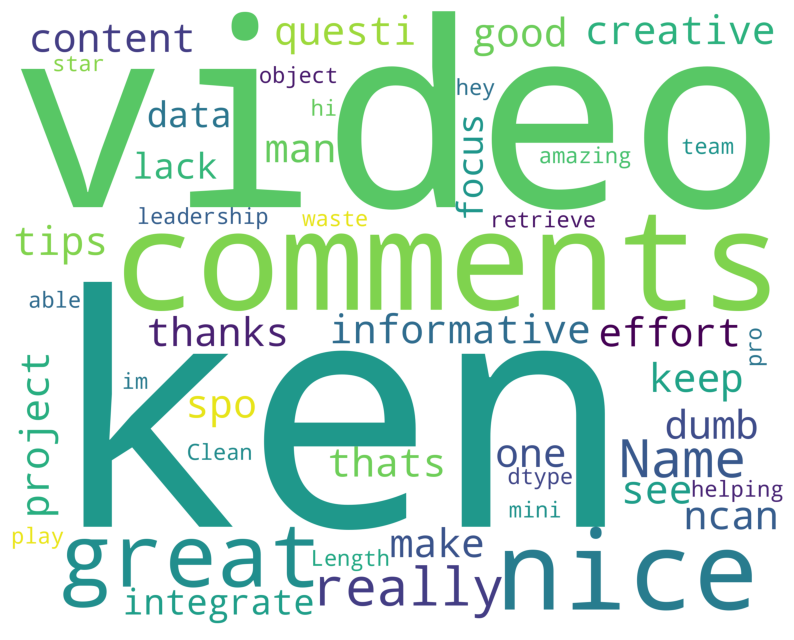

In [40]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
# check comments with positive sentiments
positive_comments = comments_clean[['Clean Comments','VidId','polarity','sentiment']].copy()
positive_comments.sort_values(by='polarity',ascending = False)

,Clean Comments,VidId,polarity,sentiment
3750,codecademy is awesome,r-DR9HBaipU,1.000,Positive
1229,this video is the best way for a well sleeping...,4OZip0cgOho,1.000,Positive
2390,a perfect routine role model for every data sc...,DM1eE_Coh6g,1.000,Positive
8053,that was awesome thank for the content,hpMc6TgT34I,1.000,Positive
4447,yayyy \nthis is an awesome idea and it helped ...,myhoWUrSP7o,1.000,Positive
...,...,...,...,...
5404,bloody well done mate,3BEtGaz70rQ,-0.800,Negative
2304,stupid f**k 😀😀😀 i like it though 🤠,4OZip0cgOho,-0.800,Negative
2068,might consider learning ux no code writing \nf...,KU__lDJj5iU,-0.875,Negative
7518,damn thats a beast and the verge is now a leve...,QQLToUlgN7A,-0.910,Negative


After reviewed 300 positive comments, mostly said
* Awesome
* Excellence (job, analysis, advice and tips)
* Beginner helped with the videos
* Brilliant idea and videos
* Great content, visualization

People looking for answer what to do to become data science, should take master degree?; mba or data science?

## Words in Negative Comments

In [42]:
wordcloud = WordCloud(width=2500, height=2000, max_words=50,
                      background_color='White').generate(str(comments_clean[(comments_clean['polarity'] < 0)].sample(100, 
                     random_state=0)['Clean Comments']))

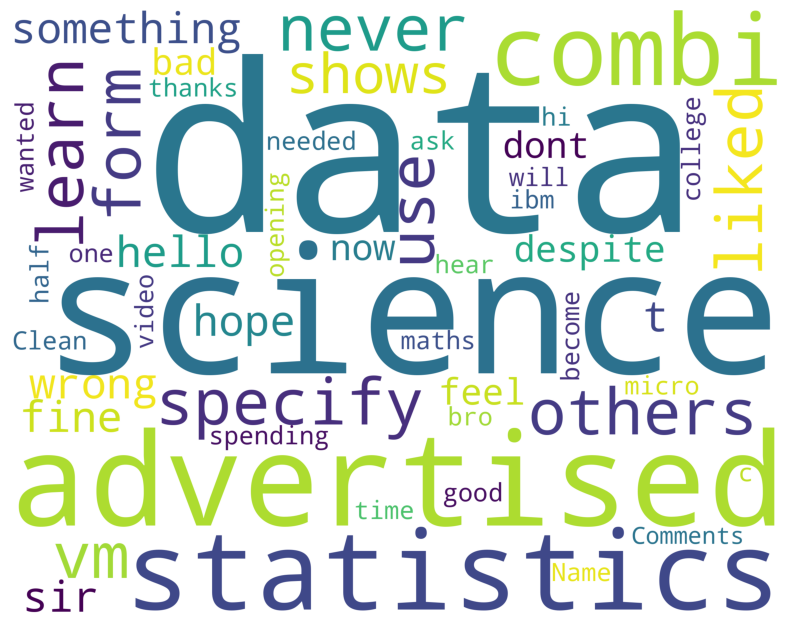

In [43]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [44]:
# check comments with negative sentiments
negative_comments = comments_clean[['Clean Comments','VidId','polarity','sentiment']].copy()
negative_comments.sort_values(by='polarity',ascending = True)


,Clean Comments,VidId,polarity,sentiment
7066,very annoying background music also in podcast...,GmW4F6MHqqs,-1.000,Negative
7518,damn thats a beast and the verge is now a leve...,QQLToUlgN7A,-0.910,Negative
2068,might consider learning ux no code writing \nf...,KU__lDJj5iU,-0.875,Negative
9816,i was also wondering for the regression since ...,-kX2b6TF_9k,-0.800,Negative
2304,stupid f**k 😀😀😀 i like it though 🤠,4OZip0cgOho,-0.800,Negative
...,...,...,...,...
9784,another awesome video would you make a video g...,vy-R4oUZaC8,1.000,Positive
2541,awesome video ken which regression project is ...,-ONQ628CXKQ,1.000,Positive
3183,all the best,1FrY7ARSf10,1.000,Positive
5674,👏👏👏 always making the best videos ken sensei,1aXk2RViq3c,1.000,Positive


After reviewed the top 200 negative comments, mostly said:

* Clickbait titles
* Annoying background music and bad mic
* Bad video light
* Errors (code error, link broken, unable to locate element)
* Not good in explaining, too slow, boring
* The content is useless

Next to do: keluarin comment positive dan negativenya apa, resume topic comment untuk jadi rekomendasi --> cek feedback dari audience

# **Export the Data**

In [45]:
comments_clean.to_csv('comments_clean.csv')